In [4]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# linear least squares method for estimating the unknown parameters in a linear regression model
# let's check how data fits in bronze and golden layers
def draw(df):
    cov_xy = (df["trip_distance"] * df["total_amount"]).sum() - (
        df["trip_distance"].sum() * df["total_amount"].sum()
    ) / len(df)
    var_xy = (df["trip_distance"] ** 2).sum() - df["trip_distance"].sum() ** 2 / len(df)
    beta = cov_xy / var_xy
    alpha = df["total_amount"].mean() - beta * df["trip_distance"].mean()

    sample = df.sample(100000)
    sample["price"] = alpha + beta * sample["trip_distance"]
    ax = sample.plot.scatter(x="trip_distance", y="total_amount")
    sample.plot.line(x="trip_distance", y="price", ax=ax, color="red")

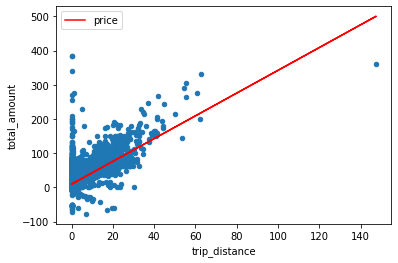

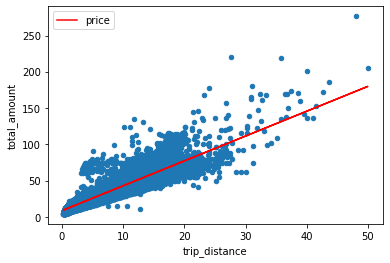

In [5]:
df_raw = pd.read_parquet("C:/data/bronze/nyc_yellow_taxi/")
df_no_outliers = pd.read_parquet("C:/data/gold/nyc_yellow_taxi_no_outliers")

draw(df_raw)
draw(df_no_outliers)